In [29]:
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#making the neural network>>>
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(25, activation='relu'))
network.add(layers.Dense(125, activation='relu'))
network.add(layers.Dense(500, activation='relu'))
network.add(layers.Dense(125, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
#making the neural network<<<



In [30]:
#resize the inputs>>>
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
#add labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#resize the inputs<<<

#training>>>
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)
#training<<<

#testing>>>
test_loss, test_acc = network.evaluate(test_images, test_labels)
#testing<<<

print('test_acc:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 55us/step - loss: 0.3423 - acc: 0.8923 - val_loss: 0.1464 - val_acc: 0.9590
Epoch 2/5
48000/48000 [==============================] - 2s 52us/step - loss: 0.1240 - acc: 0.9633 - val_loss: 0.0973 - val_acc: 0.9703
Epoch 3/5
48000/48000 [==============================] - 2s 52us/step - loss: 0.0863 - acc: 0.9746 - val_loss: 0.1093 - val_acc: 0.9688
Epoch 4/5
48000/48000 [==============================] - 2s 52us/step - loss: 0.0644 - acc: 0.9810 - val_loss: 0.1233 - val_acc: 0.9688
Epoch 5/5
10000/10000 [==============================] - 1s 74us/step
test_acc: 0.9739000201225281


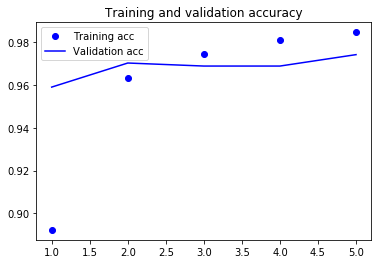

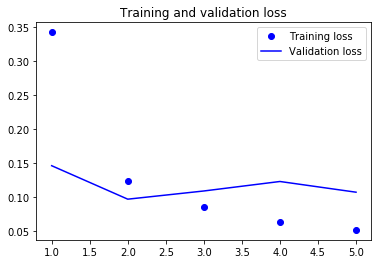

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

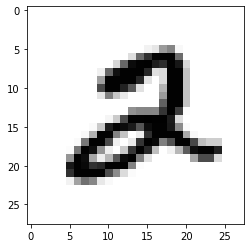

(784,)


ValueError: Error when checking input: expected dense_25_input to have shape (784,) but got array with shape (1,)

In [48]:
import matplotlib.pyplot as plt

digit = train_images[5]
digitR = digit.reshape(28,28)
plt.imshow(digitR, cmap=plt.cm.get_cmap('binary'))
plt.show()
digit = train_images[5]
print(digit.shape)
network.predict(digit)